In [12]:
####################################
# Plot figures for paper 3 (20240910 version of the paper text and figures)
# Mu-Ting Chien
# 2024.9.16
#####################################################

In [13]:
import numpy as np
import numpy.matlib as matlib
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import os
from matplotlib.cm import get_cmap
import sys
sys.path.append('/home/disk/eos4/muting/function/python/')
import create_my_colormap as mycolor
RWB = mycolor.red_white_blue()
import statsmodels.api as sm

In [14]:
DIR     = '/home/disk/eos4/muting/'
dir_out = DIR+'KW/'
fig_dir = dir_out+'figure/RA_EAPEG_EKEG/post_general_exam/paper3_fig_20240910/'
os.makedirs(fig_dir, exist_ok=True)
##########################
# Origianl data location: 
#dir_out2 = dir_out+'output_data/RA_EAPEG_EKEG/3hr/final_5reg/'
#dir_out2_org = dir_out+'output_data/RA_EAPEG_EKEG/3hr/final/'
##############################################################
# Copied data location:
dir_in = dir_out+'output_data/RA_EAPEG_EKEG/paper3_final_20240910/'

pi = np.pi
PI = '\u03C0'
bin_simple = np.arange(-pi,pi+1/4*pi,1/4*pi)
bin_simple_sparse = np.arange(-pi,pi+1/2*pi,1/2*pi)
bin_simple2 = np.arange(-pi,pi+1/2*pi,1/2*pi)
color_list = list(['orange','g','dodgerblue','m'])

In [15]:
############################
# Load data for Fig. 1: KW amplitude of F, Q, T, U (plev, lon, season), and mean U
#########################
#data = np.load(dir_out2_org+'MeanU_KW_amplitude_F_U_Q_T_plev_lon.npz')
data = np.load(dir_in+'MeanU_KW_amplitude_F_U_Q_T_plev_lon.npz')
F_amp_KW = data['F_amp_KW'][2:-2,:,:] # 2 to -2 is chosen so that the plev matches that of F_KW_small
U_amp_KW = data['U_amp_KW'][2:-2,:,:]
Q_amp_KW = data['Q_amp_KW'][2:-2,:,:]
T_amp_KW = data['T_amp_KW'][2:-2,:,:]
u_tym       = data['mean_U'][2:-2,:,:]
u_tym_10_20 = data['mean_U_10_20'][2:-2,:,:] # 10-20 S/N mean (average over winter hemisphere)
plev_amp_KW = data['plev'][2:-2]
lon         = data['lon']

# mask u that is below 650hPa so that we can focus on upper troposphere
ilev_mid = np.argwhere(plev_amp_KW==650).squeeze()
u_tym[ilev_mid:,:,:] = np.nan
u_tym_10_20[ilev_mid:,:,:] = np.nan

# Load regional mean
#data = np.load(dir_out2_org+'KW_amplitude_F_U_Q_T_plev_regional_mean.npz')
data = np.load(dir_in+'KW_amplitude_F_U_Q_T_plev_regional_mean.npz')
F_amp_KW_reg = data['F_amp_KW_reg'][2:-2,:,:] #(plev, region, season)
U_amp_KW_reg = data['U_amp_KW_reg'][2:-2,:,:] #(plev, region, season)
Q_amp_KW_reg = data['Q_amp_KW_reg'][2:-2,:,:] #(plev, region, season)
T_amp_KW_reg = data['T_amp_KW_reg'][2:-2,:,:] #(plev, region, season)

In [16]:
# Load mean SST (for Fig. 1 and 3)
#data = np.load(dir_out2_org+'SST_mean_10S-10N_1999-2013.npz')
data = np.load(dir_in+'SST_mean_10S-10N_1999-2013.npz')
lon_sst = data['lon_sst']
sst_tym = data['sst_tropics']

In [17]:
#################################
# Load data for Fig. 2
###################################
# Load Q,T,F,U kw composite (used for Fig. 2: QTFU vertical structure and EAPE/EKE growth rate)
#data       = np.load(dir_out2+'kwcomposite_3D_region_season.npz')
data       = np.load(dir_in+'kwcomposite_3D_region_season.npz')
plev       = data['plev'][1:-1]
region     = data['region']
season     = data['season']
T_KW_small = data['T_KW_small'][:,1:-1,:,:]
Q_KW_small = data['Q_KW_small'][:,1:-1,:,:]
F_KW_small = data['F_KW_small'][:,1:-1,:,:]
U_KW_small = data['U_KW_small'][:,1:-1,:,:]
nsea       = np.size(season)
nreg       = np.size(region)
nlev       = np.size(plev)

In [18]:
print(np.shape(Q_KW_small))
print(np.shape(T_KW_small))
print(np.shape(F_KW_small))
print(np.shape(U_KW_small))

(17, 21, 5, 5)
(17, 21, 5, 5)
(17, 21, 5, 5)
(17, 21, 5, 5)


In [19]:
# Load Q,T,F,U vmd output (used for Fig. 2 vertical mode decomposition)
#data = np.load(dir_out2+'kwcomposite_3D_region_season_QTFU_vmd_updated.npz')
data = np.load(dir_in+'kwcomposite_3D_region_season_QTFU_vmd_updated.npz')
plev = data['plev']
Q1_KW_small = data['Q1_KW_small']
Q2_KW_small = data['Q2_KW_small']
T1_KW_small = data['T1_KW_small']
T2_KW_small = data['T2_KW_small']
F1_KW_small = data['F1_KW_small']
F2_KW_small = data['F2_KW_small']
U1_KW_small = data['U1_KW_small']
U2_KW_small = data['U2_KW_small']

In [20]:
# Load phase bin
data = np.load(dir_in+'KW_composite_2D_LHpr.npz')
phase = data['phase']
nphase = np.size(phase)

In [21]:
# Load growth rate
#data      = np.load(dir_out2+'EAPE_EKE_growth_rate_region_season_updated.npz')
data      = np.load(dir_in+'EAPE_EKE_growth_rate_region_season_updated.npz')
EAPEGR1   = data['EAPEGR1']
EAPEGR2   = data['EAPEGR2']
EKEGR1    = data['EKEGR1']
EKEGR2    = data['EKEGR2']
ratio_gr2 = data['ratio_gr2']
EAPEGR1_str = "%.2f" %EAPEGR1[-1,-1]
EAPEGR2_str = "%.2f" %EAPEGR2[-1,-1]
EKEGR1_str = "%.2f" %EKEGR1[-1,-1]
EKEGR2_str = "%.2f" %EKEGR2[-1,-1]

In [22]:
#################################
# Load data for Fig. 3
####################################
# Load regional mean SST and U200
#data                   = np.load(dir_out+'output_data/RA_EAPEG_EKEG/3hr/final_5reg/SST_U200_regional_mean.npz')
data                   = np.load(dir_in+'SST_U200_regional_mean.npz')
u200_10_20_region_mean = data['u200_10_20_region_mean']
sst_region_mean        = data['sst_region_mean']
# remaining variabels: u200_region_mean, u200_norm, sst_norm

In [23]:
#############################################
# Fig. 3 prep: Find regression slope between EKE-to-EAPE ratio and (b) SST and (c) U200
##########################################
sst_flat       = np.ndarray.flatten(sst_region_mean[:,:4])
ratio_gr2_flat = np.ndarray.flatten(ratio_gr2[:4,:4])
u200_flat      = np.ndarray.flatten(u200_10_20_region_mean[:,:4])

# Find slope between SST and ratio_gr2
x= sm.add_constant(sst_flat)
y1= ratio_gr2_flat
REGR = sm.OLS(y1,x)
regr = REGR.fit()
p = regr.params
b_sst_ratio = p[0]
m_sst_ratio = p[1]
r_sst_ratio = regr.rsquared
bs_sst_ratio= "{:.2f}".format(b_sst_ratio.squeeze())
ms_sst_ratio = "{:.2f}".format(m_sst_ratio.squeeze())
rs_sst_ratio = "{:.2f}".format(r_sst_ratio.squeeze())
ypred_sst_ratio = sst_flat*m_sst_ratio+b_sst_ratio

# Find slope between U200 and ratio_gr2
x= sm.add_constant(u200_flat)
y1= ratio_gr2_flat
REGR = sm.OLS(y1,x)
regr = REGR.fit()
p = regr.params
b_u200_ratio = p[0]
m_u200_ratio = p[1]
r_u200_ratio = regr.rsquared
bs_u200_ratio = "{:.2f}".format(b_u200_ratio.squeeze())
ms_u200_ratio = "{:.2f}".format(m_u200_ratio.squeeze())
rs_u200_ratio = "{:.2f}".format(r_u200_ratio.squeeze())
ypred_u200_ratio = u200_flat*m_u200_ratio+b_u200_ratio

In [24]:
######################################
# Mark region for Fig. 1
#######################################
lon_min = np.array([55, 130, 250, 345, 0])
dx      = 2.5
#lon_max = np.array([130, 250, 345, 55, 360-dx])
lon_max = np.array([130-dx, 250-dx, 345-dx, 55-dx, 360-dx])

region_contour = np.empty([np.size(plev),np.size(lon),nreg])
region_contour[:,:,:] = 0
region_contour[-1,:,:] = np.nan
for ireg in range(0,4):
    ilon_min = np.argwhere(lon==lon_min[ireg]).squeeze()
    ilon_max = np.argwhere(lon==lon_max[ireg]).squeeze()
    if ireg == 0 or ireg == 1 or ireg == 2:
        region_contour[-1:, ilon_min:ilon_max+1, ireg] = 10
    else:
        region_contour[-1:, 0:ilon_max+1, ireg] = 10
        region_contour[-1:, ilon_min:, ireg] = 10

show_region = 0
if show_region == 1:
    for ireg in range(0,4):
        plt.subplot(4,1,ireg+1)
        plt.plot(lon, region_contour[-1,:,ireg],color=color_list[ireg])
        plt.xlim([0,360])
    plt.show()

/home/disk/p/muting/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: No contour levels were found within the data range.
/home/disk/p/muting/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: No contour levels were found within the data range.
/home/disk/p/muting/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: No contour levels were found within the data range.
/home/disk/p/muting/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: No contour levels were found within the data range.


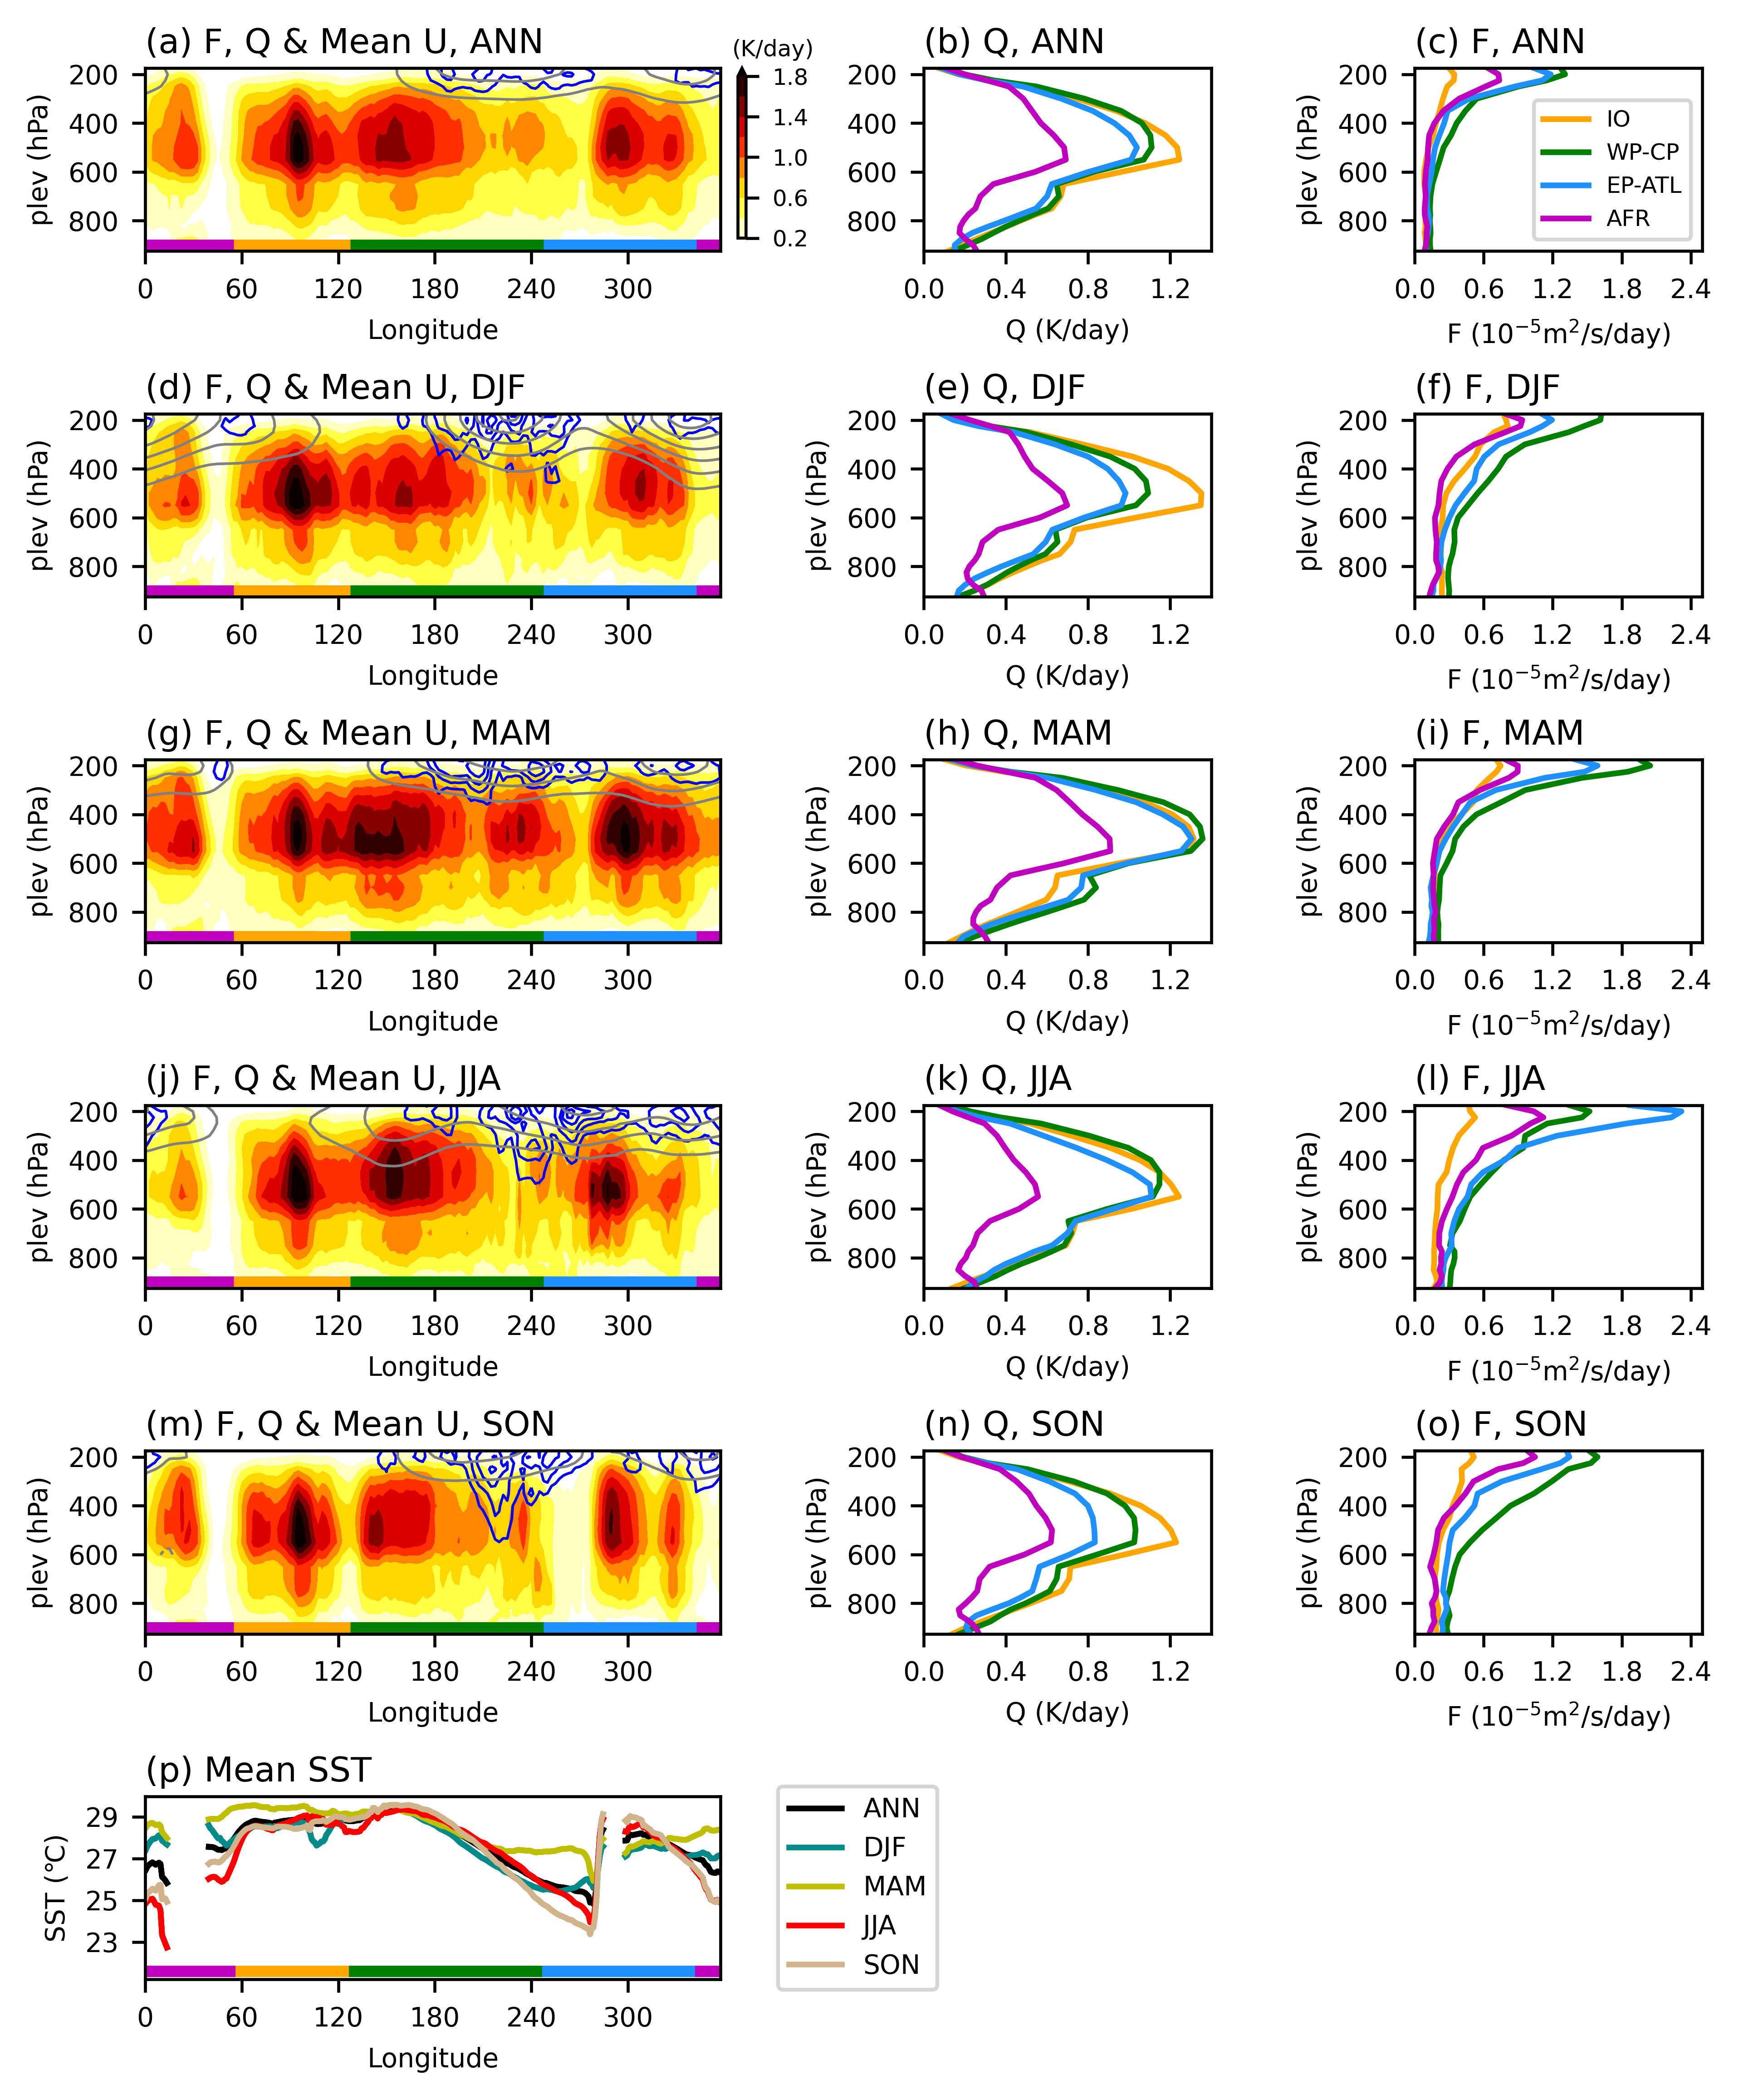

In [25]:
########################
# Figure 1:Amplitude of momentum flux convergence and zonal wind U
# (a) Lon-plev Famp, with u climatology, ANN
# (b) plev Famp, average for each region, ANN
# (c) same as a, DJF
# (d) same as b, DJF
# (e) same as a, JJA
# (f) same as b, JJA
###################################################
#season_idx = np.array([4,0,2])
season_idx = np.array([4,0,1,2,3])
season = list(['DJF','MAM','JJA','SON','ANN'])
label = list(['(a)','(b)','(c)','(d)','(e)','(f)','(g)','(h)','(i)','(j)','(k)','(l)','(m)','(n)','(o)'])
    
font = 7
#fig,axes = plt.subplots(3,2,figsize=(6.5, 4.5),dpi=600)
fig,axes = plt.subplots(6,3,figsize=(6.5, 7.8),dpi=600)
#gs = fig.add_gridspec(3, 2,width_ratios=[2,1],height_ratios=[2,2,2])
gs = fig.add_gridspec(6, 3,width_ratios=[2,1,1],height_ratios=[2,2,2,2,2,2])
plt.subplots_adjust(left=0.1,right=0.98,top=0.95,bottom=0.05, hspace=0.89, wspace=0.53)
plt.rcParams.update({'font.size': font})
xx, yy = np.meshgrid(lon, plev)

#clev = np.arange(0.3,3,0.3)*10**(-5) # for F
clev = np.arange(1.2,3.6,0.6)*10**(-5)
#clev = np.arange(0.8,5.6,0.8)*10**(-5)
#ticks = clev #np.arange(4,14,2)*10**(-5)
#clev_p_10_20 = np.arange(4,36,4) # for u
clev_p_10_20 = np.arange(8,36,4) # for u
clev_n_10_20 = np.arange(-32,0,4) # for u
clev_p = np.arange(2,32,2) # for u
clev_n = np.arange(-30,0,2)
clev_0 = 0 # for u
clev_Q = np.arange(0.2,2,0.2)
ticks = np.arange(0.2,2.2,0.4)
    
#for iseason in range(0,3):
for iseason in range(0,5):
    
    # plot F (shading) and U (contour) (plev, lon)
    ax2  = fig.add_subplot(gs[ iseason,0 ])
    isea = season_idx[iseason]
    #plt.title((label[iseason*2]+' KW composite F & Mean U, '+season[isea]), pad=4, loc='left',fontsize=9)
    #plt.title((label[iseason*3]+' KW composite F & Q & Mean U, '+season[isea]), pad=4, loc='left',fontsize=9)
    plt.title((label[iseason*3]+' F, Q & Mean U, '+season[isea]), pad=4, loc='left',fontsize=9)
    #cf  = plt.contour(xx, yy, F_amp_KW[:,:,isea], levels=clev, cmap='hot_r', extend='max' )
    cn  = plt.contour(xx, yy, F_amp_KW[:,:,isea], levels=clev, colors='blue', extend='max', linewidths=0.7 )
    cf  = plt.contourf(xx, yy, Q_amp_KW[:,:,isea], levels=clev_Q, cmap='hot_r', extend='max' )
    if iseason == 0:
        #cb = plt.colorbar(cf, ax=axes[iseason,:], orientation = 'vertical', shrink=.8, aspect=20,pad=0.01)
        cb = plt.colorbar(cf, ax=axes[iseason,:], orientation = 'vertical', shrink=.8, aspect=20,pad=0.01)
        cb.set_ticks(ticks)  
        cb.ax.set_position([0.435, 0.87, 0.5, 0.08])
        cb.ax.tick_params(labelsize=6)
        # Add unit for colorbar
        ax = plt.gca()
        ax.text(1.02, 1.04, '(K/day)',\
        verticalalignment='bottom', horizontalalignment='left',transform=ax.transAxes,\
        color='k', fontsize=6) #unit of the colorbar
    
    ###########
    # PLot U200 from 10-20S/N
    cn_p = plt.contour(xx, yy, u_tym_10_20[:,:,isea], levels=clev_p_10_20, colors='grey', linewidths=0.7)#0.4*2)
    cn_n = plt.contour(xx, yy, u_tym_10_20[:,:,isea], levels=clev_n_10_20, colors='grey', linewidths=0.7, linestyles='dashed')
    ##############
    
    for ireg in range(0,4):
        cn = plt.contour(xx, yy, region_contour[:,:,ireg],levels=10, colors=color_list[ireg], linewidths=3) # mark region
    #plt.yticks(np.arange(200,1000,100),fontsize=font)
    plt.yticks(np.arange(200,1000,200),fontsize=font)
    plt.gca().invert_yaxis()
    plt.ylabel('plev (hPa)',fontsize=font)
    plt.xlabel('Longitude',fontsize=font)
    plt.xticks(np.arange(0,360,60),fontsize=font)

    # Plot 1 line for each region for Q
    ax2  = fig.add_subplot(gs[ iseason,1 ])
    ax = plt.gca()
    plt.title((label[iseason*3+1]+' Q, '+season[isea]), pad=4, loc='left',fontsize=9)
    #plt.tick_params(bottom=True,top=False,left=False,right=True)
    plt.tick_params(bottom=True,top=False,left=True,right=False)
    for ireg in range(0,nreg-1):
        plt.plot(Q_amp_KW_reg[:,ireg,isea],plev,color=color_list[ireg])
        plt.xlabel('Q (K/day)',fontsize=font)
        plt.tick_params(labelbottom=True,labeltop=False,labelleft=True,labelright=False)
        #plt.tick_params(labelbottom=True,labeltop=False,labelleft=False,labelright=True)
    #if iseason == 0:
    #    #plt.legend(['IO','WP-CP','EP-ATL','AFR'],loc='lower right')
    #    #ax.legend(['IO','WP-CP','EP-ATL','AFR'],bbox_to_anchor=(1.65, 0.5), loc='center right',fontsize=7)
    plt.ylim(np.min(plev),np.max(plev))
    #plt.yticks(np.arange(200,1000,100),fontsize=font)
    plt.yticks(np.arange(200,1000,200),fontsize=font)
    plt.gca().invert_yaxis()
    plt.xlim([0,1.4])
    plt.xticks(np.arange(0,1.6,0.4),fontsize=font)
    #plt.xticks(np.arange(0.3,1.5,0.3)*10**(-5))
    if iseason !=0:
        plt.ylabel('plev (hPa)',fontsize=font)
    
    
    # Plot 1 line for each region for F
    ax2  = fig.add_subplot(gs[ iseason,2 ])
    ax = plt.gca()
    plt.title((label[iseason*3+2]+' F, '+season[isea]), pad=4, loc='left',fontsize=9)
    plt.tick_params(bottom=True,top=False,left=True,right=False)
    for ireg in range(0,nreg-1):
        plt.plot(F_amp_KW_reg[:,ireg,isea]*10**5,plev,color=color_list[ireg])
        plt.xlabel('F (10${^{-5}}$m${^2}$/s/day)',fontsize=font)
        plt.tick_params(labelbottom=True,labeltop=False,labelleft=True,labelright=False)
        #plt.tick_params(labelbottom=True,labeltop=False,labelleft=False,labelright=True)
    if iseason == 0:
        plt.legend(['IO','WP-CP','EP-ATL','AFR'],loc='lower right', fontsize=6)
        #ax.legend(['IO','WP-CP','EP-ATL','AFR'],bbox_to_anchor=(1.65, 0.5), loc='center right',fontsize=7)
    plt.ylim(np.min(plev),np.max(plev))
    #plt.yticks(np.arange(200,1000,100),fontsize=font)
    plt.yticks(np.arange(200,1000,200),fontsize=font)
    plt.gca().invert_yaxis()
    #plt.xlim([0,2.5*10**(-5)])
    plt.xlim([0,2.5])
    #plt.xticks(np.arange(0.3,1.5,0.3)*10**(-5))
    #plt.xticks(np.arange(0,3,0.5)*10**(-5))
    #plt.xticks(np.arange(0,3,0.6)*10**(-5))
    plt.xticks(np.arange(0,3,0.6))
    plt.ylabel('plev (hPa)',fontsize=font)

# Plot SST
region_contour_sst = region_contour[-1,:,:]/10*0.95*np.nanmin(sst_tym)
ax2  = fig.add_subplot(gs[ 5,0 ])
ax = plt.gca()
plt.title(('(p) Mean SST'), pad=4, loc='left',fontsize=9)
for ireg in range(0,nreg-1):
    plt.plot(lon_sst,sst_tym[:,-1], color='k')
    plt.plot(lon_sst,sst_tym[:,0], color='darkcyan')
    plt.plot(lon_sst,sst_tym[:,1], color='y')
    plt.plot(lon_sst,sst_tym[:,2], color='r')
    plt.plot(lon_sst,sst_tym[:,3], color='tan')
    plt.plot(lon, region_contour_sst[:,ireg],color=color_list[ireg],linewidth=3)
    plt.xlabel('Longitude')
    plt.ylabel('SST (\u2103)')
    plt.tick_params(labelbottom=True,labeltop=False,labelleft=True,labelright=False)
ax.legend(['ANN','DJF','MAM','JJA','SON'],bbox_to_anchor=(1.4, 0.5), loc='center right',fontsize=7)
plt.yticks(np.arange(23,31,2),fontsize=7)
plt.xticks(np.arange(0,360,60),fontsize=7)
plt.xlim([np.min(lon),np.max(lon)])
    
for ax in axes[0:,0]:
    ax.remove()
    
for ax in axes[0:,1]:
    ax.remove()
    
for ax in axes[0:,2]:
    ax.remove()
    
plt.savefig(fig_dir+'Fig1_Famp_U_Qamp_plev_lon.png',dpi=600)
plt.show()

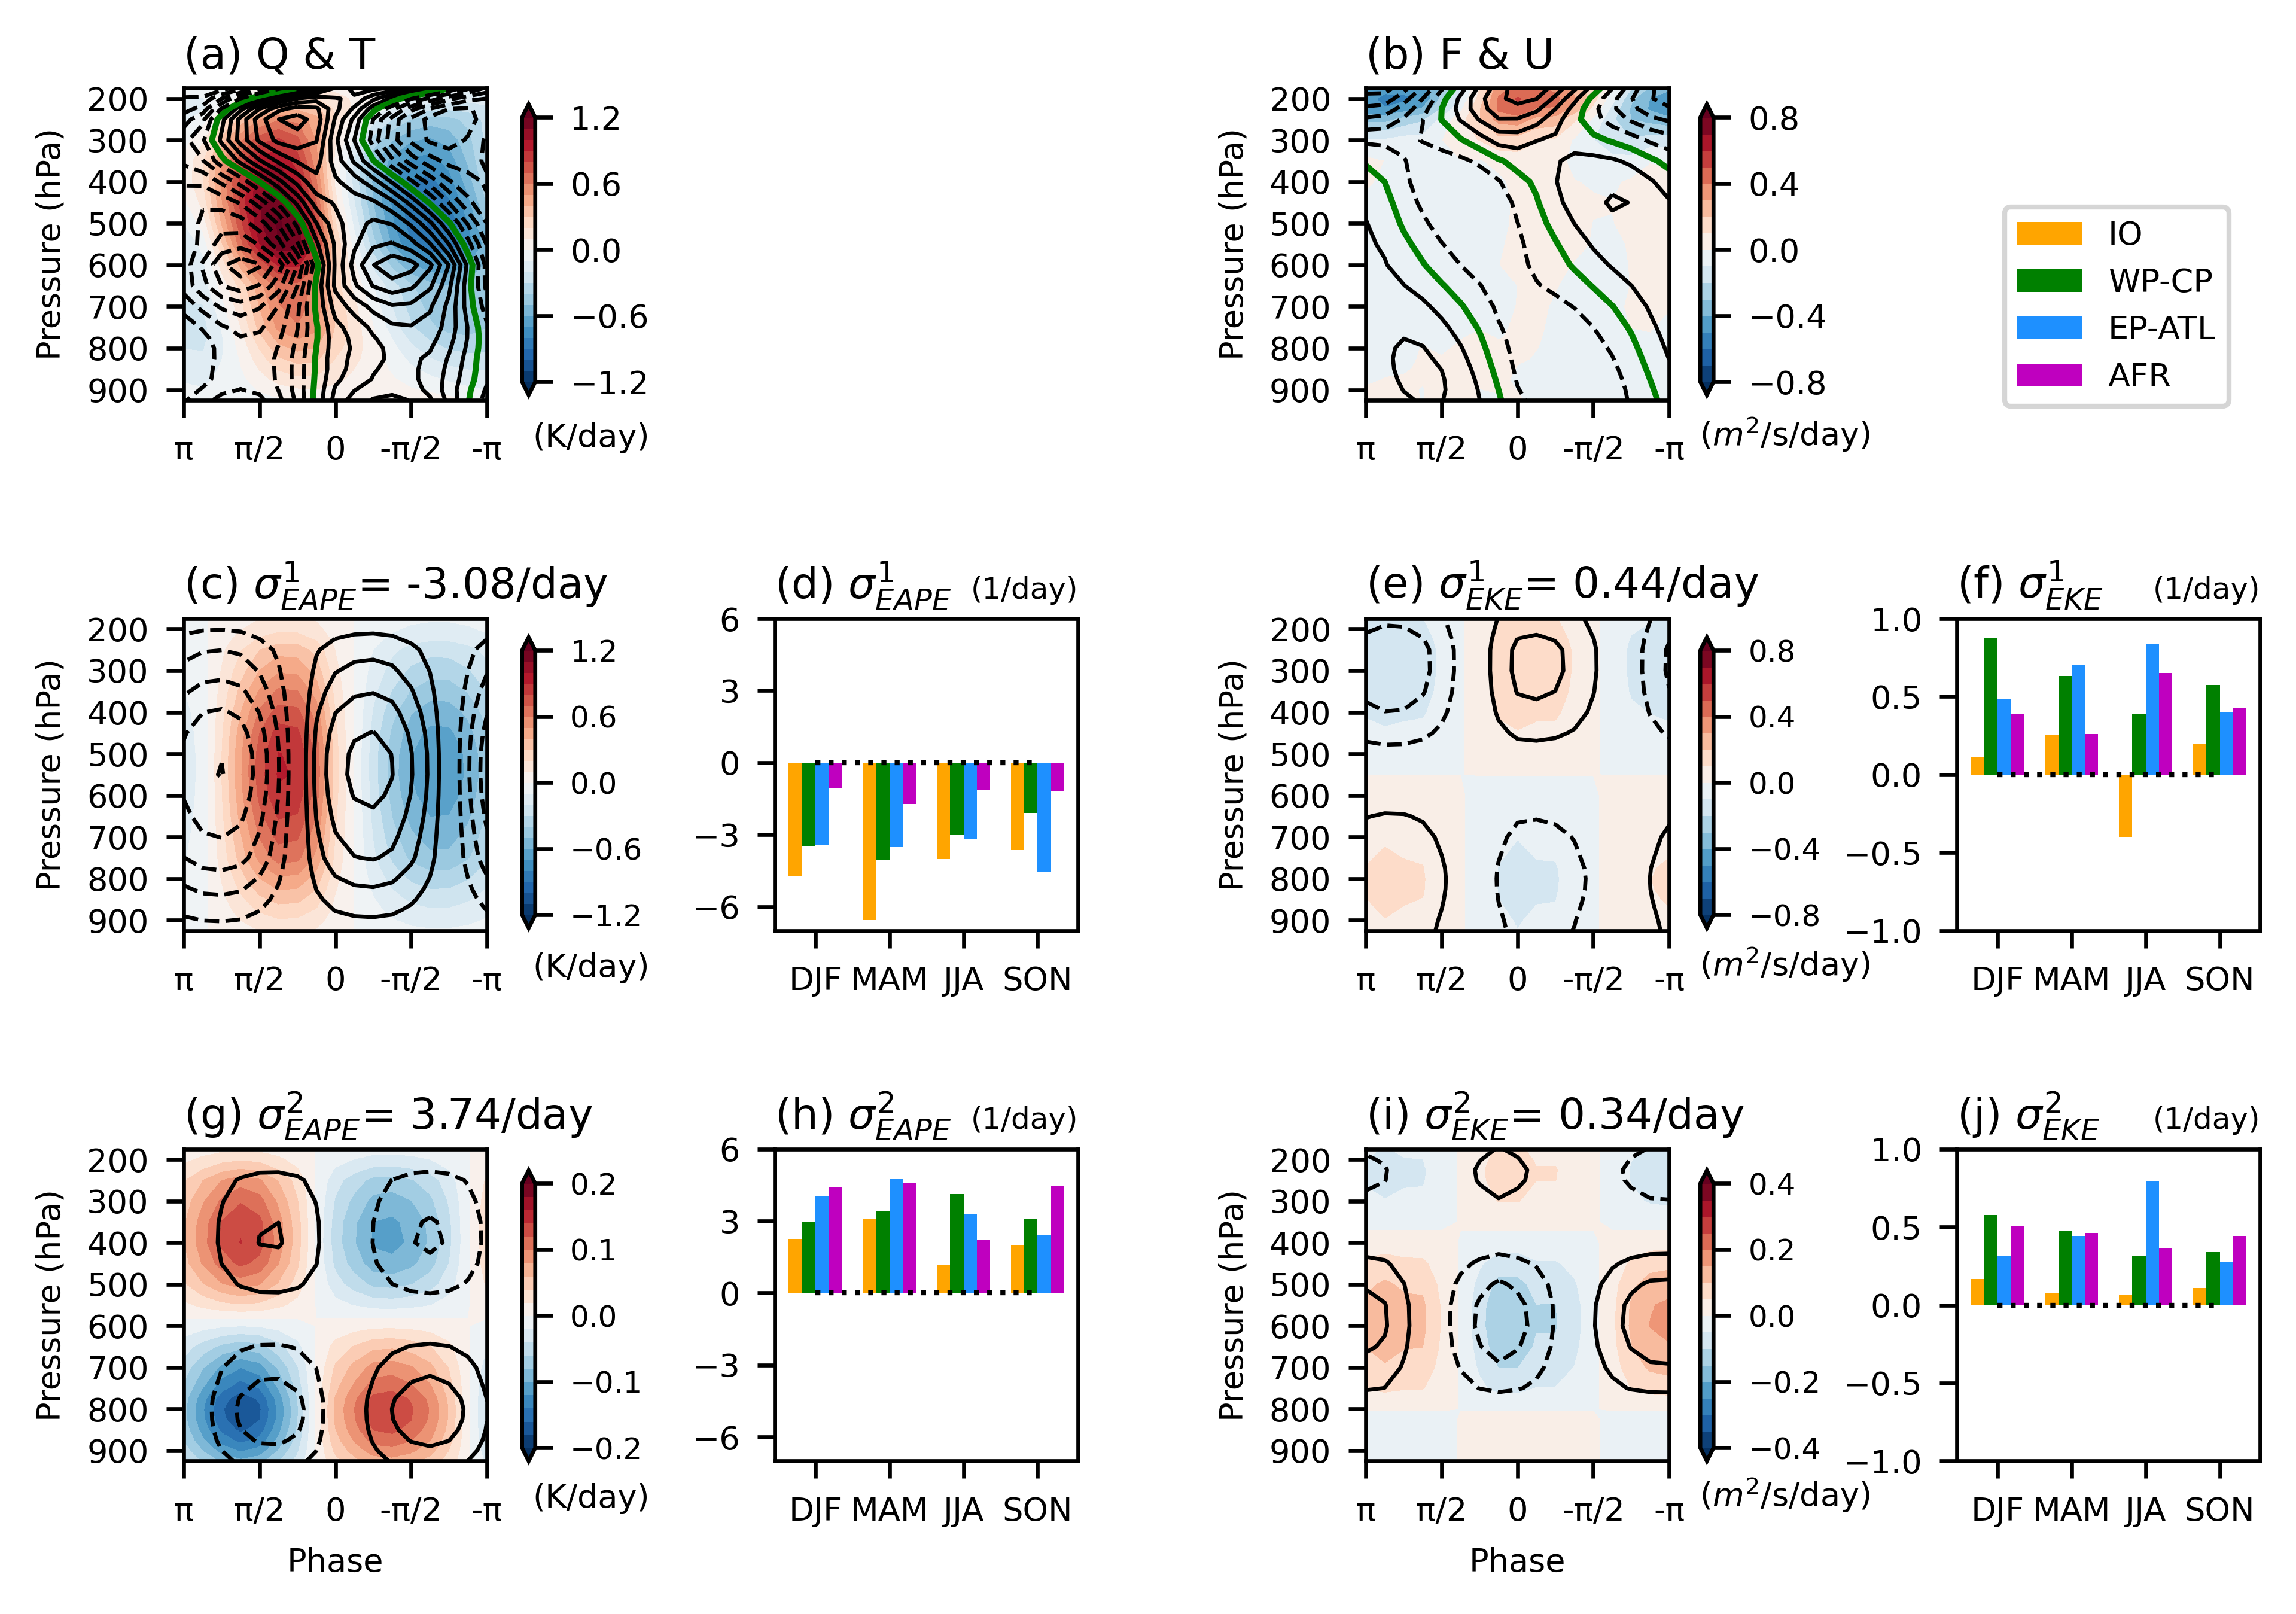

In [26]:
########################
# Figure 2: Plot Q,T, F,U vmd (only global) (change colorbar)
#####################
plot_fignum = 3 # total, 1st mode, 2nd mode
txt_xloc = -6
txt_yloc = (np.min(plev)+np.max(plev))/2
row_name = list(['(a) Total','(b) 1$^{st}$ mode','(c) 2$^{nd}$ mode'])
title_noabc = region
clev_0 = 0
font = 6.5
title = list(['(a) Q & T','(b) F & U'])
unit = list(['K/day','$m^{2}$/s/day'])
xloc = np.array([1.15,1.1])

fig,axes = plt.subplots(3,4,figsize=(6.5, 4.5),dpi=600)
plt.subplots_adjust(left=0.08,right=0.97, top=0.95,bottom=0.1,hspace=0.7,wspace=0.95) # originally 0.91
plt.rcParams.update({'font.size': font})

# Plot EAPE and EKE growth rate for each region and season    
vname_list = list(['EAPEGR1','EKEGR1','EAPEGR2','EKEGR2'])
ylabel_list = list(['$\u03C3^{\t{1}}_{\t{EAPE}}$','$\u03C3^{\t{1}}_{\t{EKE}}$',\
                   '$\u03C3^{\t{2}}_{\t{EAPE}}$','$\u03C3^{\t{2}}_{\t{EKE}}$'])
title_list = list(['(d) $\u03C3^{\t{1}}_{\t{EAPE}}$','(f) $\u03C3^{\t{1}}_{\t{EKE}}$',\
                   '(h) $\u03C3^{\t{2}}_{\t{EAPE}}$','(j) $\u03C3^{\t{2}}_{\t{EKE}}$'])
x = np.arange(0,4)
zero = np.zeros([np.size(x)])
for iplt in range(0,4):
    plt.subplot(3, 4, 2*iplt+5+1)
    ax = plt.gca()
    r = globals()[vname_list[iplt]]
    dx = 0.18    
    plt.bar(x, r[0, :-1], color='orange',width=dx) #color='darkblue'
    plt.bar(x+dx, r[1, :-1], color='green',width=dx)
    plt.bar(x+dx*2, r[2, :-1], color='dodgerblue',width=dx)
    plt.bar(x+dx*3, r[3, :-1], color='m',width=dx)
    if iplt == 1:
        #ax.legend(region, loc='upper left',fontsize=6)
        ax.legend(region,bbox_to_anchor=(0.95, 2), loc='center right',fontsize=font)
    plt.plot(x+dx*1.5, zero, 'k:', linewidth=1)
    plt.xticks(x+dx*1.5,('DJF','MAM','JJA','SON'),fontsize=font)
    if iplt == 0 or iplt == 2:
        plt.ylim([-7,6])
        plt.yticks(np.arange(-6,9,3),fontsize=font)
    else:
        plt.ylim([-1,1])
        plt.yticks(np.arange(-1,1.5,0.5),fontsize=font)
    #plt.ylabel('\u03C3 (1/day)',fontsize=font)
    plt.title(title_list[iplt], pad=4, loc='left',fontsize=8.5)
    ax.set_title('(1/day)',pad=4, loc='right',fontsize=6)

# Plot KW composite Q and T vertical structure
for iplt in range(0,2): #(iplt=0, QT, iplt=1, FU)

    if iplt == 0:
        clev_n = np.arange(-6,0,0.5)/10/2 #/10 only
        clev_p = np.arange(0.5,6.5,0.5)/10/2
        #clev   = np.arange(-6,6.5,0.5)/2*0.2 
        #ticks  = np.arange(-0.6,0.9,0.3)
        clev   = np.arange(-1.2,1.3,0.1) # Total
        clev2  = np.arange(-0.2,0.22,0.02) # 2nd mode
        ticks  = np.arange(-1.2,1.8,0.6)
        ticks2 = np.arange(-0.2,0.3,0.1)
        var_cf  = globals()['Q_KW_small']
        var_cn  = globals()['T_KW_small']
        var1_cf = globals()['Q1_KW_small']
        var2_cf = globals()['Q2_KW_small']
        var1_cn = globals()['T1_KW_small']
        var2_cn = globals()['T2_KW_small']
    elif iplt == 1:
        clev_n = np.arange(-2.2,0,0.2)*1.5
        clev_p = np.arange(0.2,2.2,0.2)*1.5
        #clev   = np.arange(-2,2.2,0.2)*1.5*0.2 
        #ticks  = np.arange(-0.6,0.9,0.3)
        clev  = np.arange(-0.8,0.9,0.1) # Total
        clev2 = np.arange(-0.4,0.45,0.05) # 2nd mode
        ticks = np.arange(-0.8,1.2,0.4)
        ticks2 = np.arange(-0.4,0.6,0.2)
        var_cf = globals()['F_KW_small']*86400
        var_cn = globals()['U_KW_small']
        var1_cf = globals()['F1_KW_small']*86400
        var2_cf = globals()['F2_KW_small']*86400
        var1_cn = globals()['U1_KW_small']
        var2_cn = globals()['U2_KW_small']

    # Total
    plt.subplot(plot_fignum,4,iplt*2+1)
    ax = plt.gca()
    plt.title(title[iplt], pad=4, loc='left',fontsize=8.5)
    xx, yy = np.meshgrid(phase, plev)
    cf  = plt.contourf(xx, yy, var_cf[:,:,-1,-1].T, levels=clev, cmap='RdBu_r', extend='both' )
    cn_p = plt.contour(xx, yy, var_cn[:,:,-1,-1].T, levels=clev_p, colors='k', linewidths=0.4*2)
    cn_0 = plt.contour(xx, yy, var_cn[:,:,-1,-1].T, levels=clev_0, colors='g', linewidths=1.2)
    cn_n = plt.contour(xx, yy, var_cn[:,:,-1,-1].T, levels=clev_n, colors='k', linestyles='dashed',linewidths=0.4*2)
    plt.ylim([np.min(plev),np.max(plev)])
    plt.yticks(np.arange(200,1000,100),fontsize=font)
    plt.gca().invert_yaxis()
    plt.xticks(bin_simple2,(PI,PI+'/2','0','-'+PI+'/2','-'+PI),fontsize=font)
    plt.tick_params(bottom=True,top=False,left=True,right=False)
    plt.tick_params(labelbottom=True,labeltop=False,labelleft=True,labelright=False)
    ax.set_ylabel('Pressure (hPa)',fontsize=font)    
    #plt.xlabel('Phase',fontsize=font)
    # Manually adjust the position of the colorbar
    #cb = plt.colorbar(cf,ax=axes[0,iplt*2],orientation = 'horizontal', shrink=.7, aspect=20)#,pad=-0.9) 
    cb = plt.colorbar(cf,ax=axes[0,iplt*2],orientation = 'vertical', shrink=.9, aspect=20)#,pad=-0.9) 
    cb.set_ticks(ticks)  
    if iplt == 0:
        #cb.ax.set_position([0.085, 0.68, 0.15, 0.04])  # [left, bottom, width, height]
        cb.ax.set_position([0.085+0.14, 0.68+0.08, 0.15, 0.18])  # [left, bottom, width, height]
    else:
        #cb.ax.set_position([0.325+iplt/4, 0.68, 0.15, 0.04])
        cb.ax.set_position([0.325+iplt/4+0.155, 0.68+0.08, 0.15, 0.18])
    # Add unit for colorbar
    ax.text(xloc[iplt], -0.17, '('+unit[iplt]+')',\
    verticalalignment='bottom', horizontalalignment='left',transform=ax.transAxes,\
    color='k', fontsize=font) #unit of the colorbar    
    
    # 1st mode
    plt.subplot(plot_fignum,4,iplt*2+1+4)
    ax = plt.gca()
    if iplt == 0:
        plt.title(('(c) $\u03C3^{\t{1}}_{\t{EAPE}}$= '+EAPEGR1_str+'/day'), pad=4, loc='left',fontsize=8.5)
    else:
        plt.title(('(e) $\u03C3^{\t{1}}_{\t{EKE}}$= '+EKEGR1_str+'/day'), pad=4, loc='left',fontsize=8.5)
    cf  = plt.contourf(xx, yy, var1_cf[:,:,-1,-1].T, levels=clev, cmap='RdBu_r', extend='both' )
    cn_p = plt.contour(xx, yy, var1_cn[:,:,-1,-1].T, levels=clev_p, colors='k', linewidths=0.4*2)
    cn_n = plt.contour(xx, yy, var1_cn[:,:,-1,-1].T, levels=clev_n, colors='k', linestyles='dashed',linewidths=0.4*2)
    plt.ylim([np.min(plev),np.max(plev)])
    plt.yticks(np.arange(200,1000,100),fontsize=font)
    plt.gca().invert_yaxis()
    plt.xticks(bin_simple2,(PI,PI+'/2','0','-'+PI+'/2','-'+PI),fontsize=font)
    plt.tick_params(bottom=True,top=False,left=True,right=False)
    plt.tick_params(labelbottom=True,labeltop=False,labelleft=True,labelright=False)
    ax.set_ylabel('Pressure (hPa)',fontsize=font)  
    #plt.xlabel('Phase',fontsize=font)
    #cb = plt.colorbar(cf,ax=axes[1,iplt*2],orientation = 'horizontal', shrink=.7, aspect=20)#,pad=-0.9) 
    cb = plt.colorbar(cf,ax=axes[1,iplt*2],orientation = 'vertical', shrink=.9, aspect=20)#,pad=-0.9) 
    cb.ax.tick_params(labelsize=6)
    # Manually adjust the position of the colorbar
    cb.set_ticks(ticks)  
    if iplt == 0:
        #cb.ax.set_position([0.085, 0.38, 0.15, 0.04])  # [left, bottom, width, height]
        cb.ax.set_position([0.085+0.14, 0.38+0.05, 0.15, 0.18])  # [left, bottom, width, height]
    else:
        #cb.ax.set_position([0.325+iplt/4, 0.38, 0.15, 0.04])
        cb.ax.set_position([0.325+iplt/4+0.155, 0.38+0.05, 0.15, 0.18])
    # Add unit for colorbar
    ax.text(xloc[iplt], -0.17, '('+unit[iplt]+')',\
    verticalalignment='bottom', horizontalalignment='left',transform=ax.transAxes,\
    color='k', fontsize=font) #unit of the colorbar    
    
    # 2nd mode
    plt.subplot(plot_fignum,4,iplt*2+1+8)
    ax = plt.gca()
    if iplt == 0:
        plt.title(('(g) $\u03C3^{\t{2}}_{\t{EAPE}}$= '+EAPEGR2_str+'/day'), pad=4, loc='left',fontsize=8.5)
    else:
        plt.title(('(i) $\u03C3^{\t{2}}_{\t{EKE}}$= '+EKEGR2_str+'/day'), pad=4, loc='left',fontsize=8.5)
    cf  = plt.contourf(xx, yy, var2_cf[:,:,-1,-1].T, levels=clev2, cmap='RdBu_r', extend='both' )
    cn_p = plt.contour(xx, yy, var2_cn[:,:,-1,-1].T, levels=clev_p, colors='k', linewidths=0.4*2)
    cn_n = plt.contour(xx, yy, var2_cn[:,:,-1,-1].T, levels=clev_n, colors='k', linestyles='dashed',linewidths=0.4*2) 
    plt.ylim([np.min(plev),np.max(plev)])
    plt.yticks(np.arange(200,1000,100),fontsize=font)
    plt.gca().invert_yaxis()
    plt.xticks(bin_simple2,(PI,PI+'/2','0','-'+PI+'/2','-'+PI),fontsize=font)
    plt.tick_params(bottom=True,top=False,left=True,right=False)
    plt.tick_params(labelbottom=True,labeltop=False,labelleft=True,labelright=False)
    ax.set_ylabel('Pressure (hPa)',fontsize=font)    
    plt.xlabel('Phase',fontsize=font)
    
    cb = plt.colorbar(cf,ax=axes[2,iplt*2],orientation = 'vertical', shrink=.9, aspect=20)#,pad=-0.9) 
    #cb = plt.colorbar(cf,ax=axes[2,iplt*2],orientation = 'horizontal', shrink=.7, aspect=20)#,pad=-0.9) 
    cb.ax.tick_params(labelsize=6)
    # Manually adjust the position of the colorbar
    cb.set_ticks(ticks2)  
    if iplt == 0:
        #cb.ax.set_position([0.085, 0.08, 0.15, 0.04])  # [left, bottom, width, height]
        cb.ax.set_position([0.085+0.14, 0.1, 0.15+0.1, 0.18])  # [left, bottom, width, height]
    else:
        #cb.ax.set_position([0.325+iplt/4, 0.08, 0.15, 0.04])
        cb.ax.set_position([0.325+iplt/4+0.155, 0.1, 0.15+0.1, 0.18])  # [left, bottom, width, height]

    # Add unit for colorbar
    ax.text(xloc[iplt], -0.17, '('+unit[iplt]+')',\
    verticalalignment='bottom', horizontalalignment='left',transform=ax.transAxes,\
    color='k', fontsize=font) #unit of the colorbar
    
for ax in axes[0,1:2]:
    ax.remove()   
for ax in axes[0,3:]:
    ax.remove()
    
plt.savefig(fig_dir+'Fig2_QTFU_KW_1st_2nd_change_colorbar.png',dpi=600)
plt.show()            

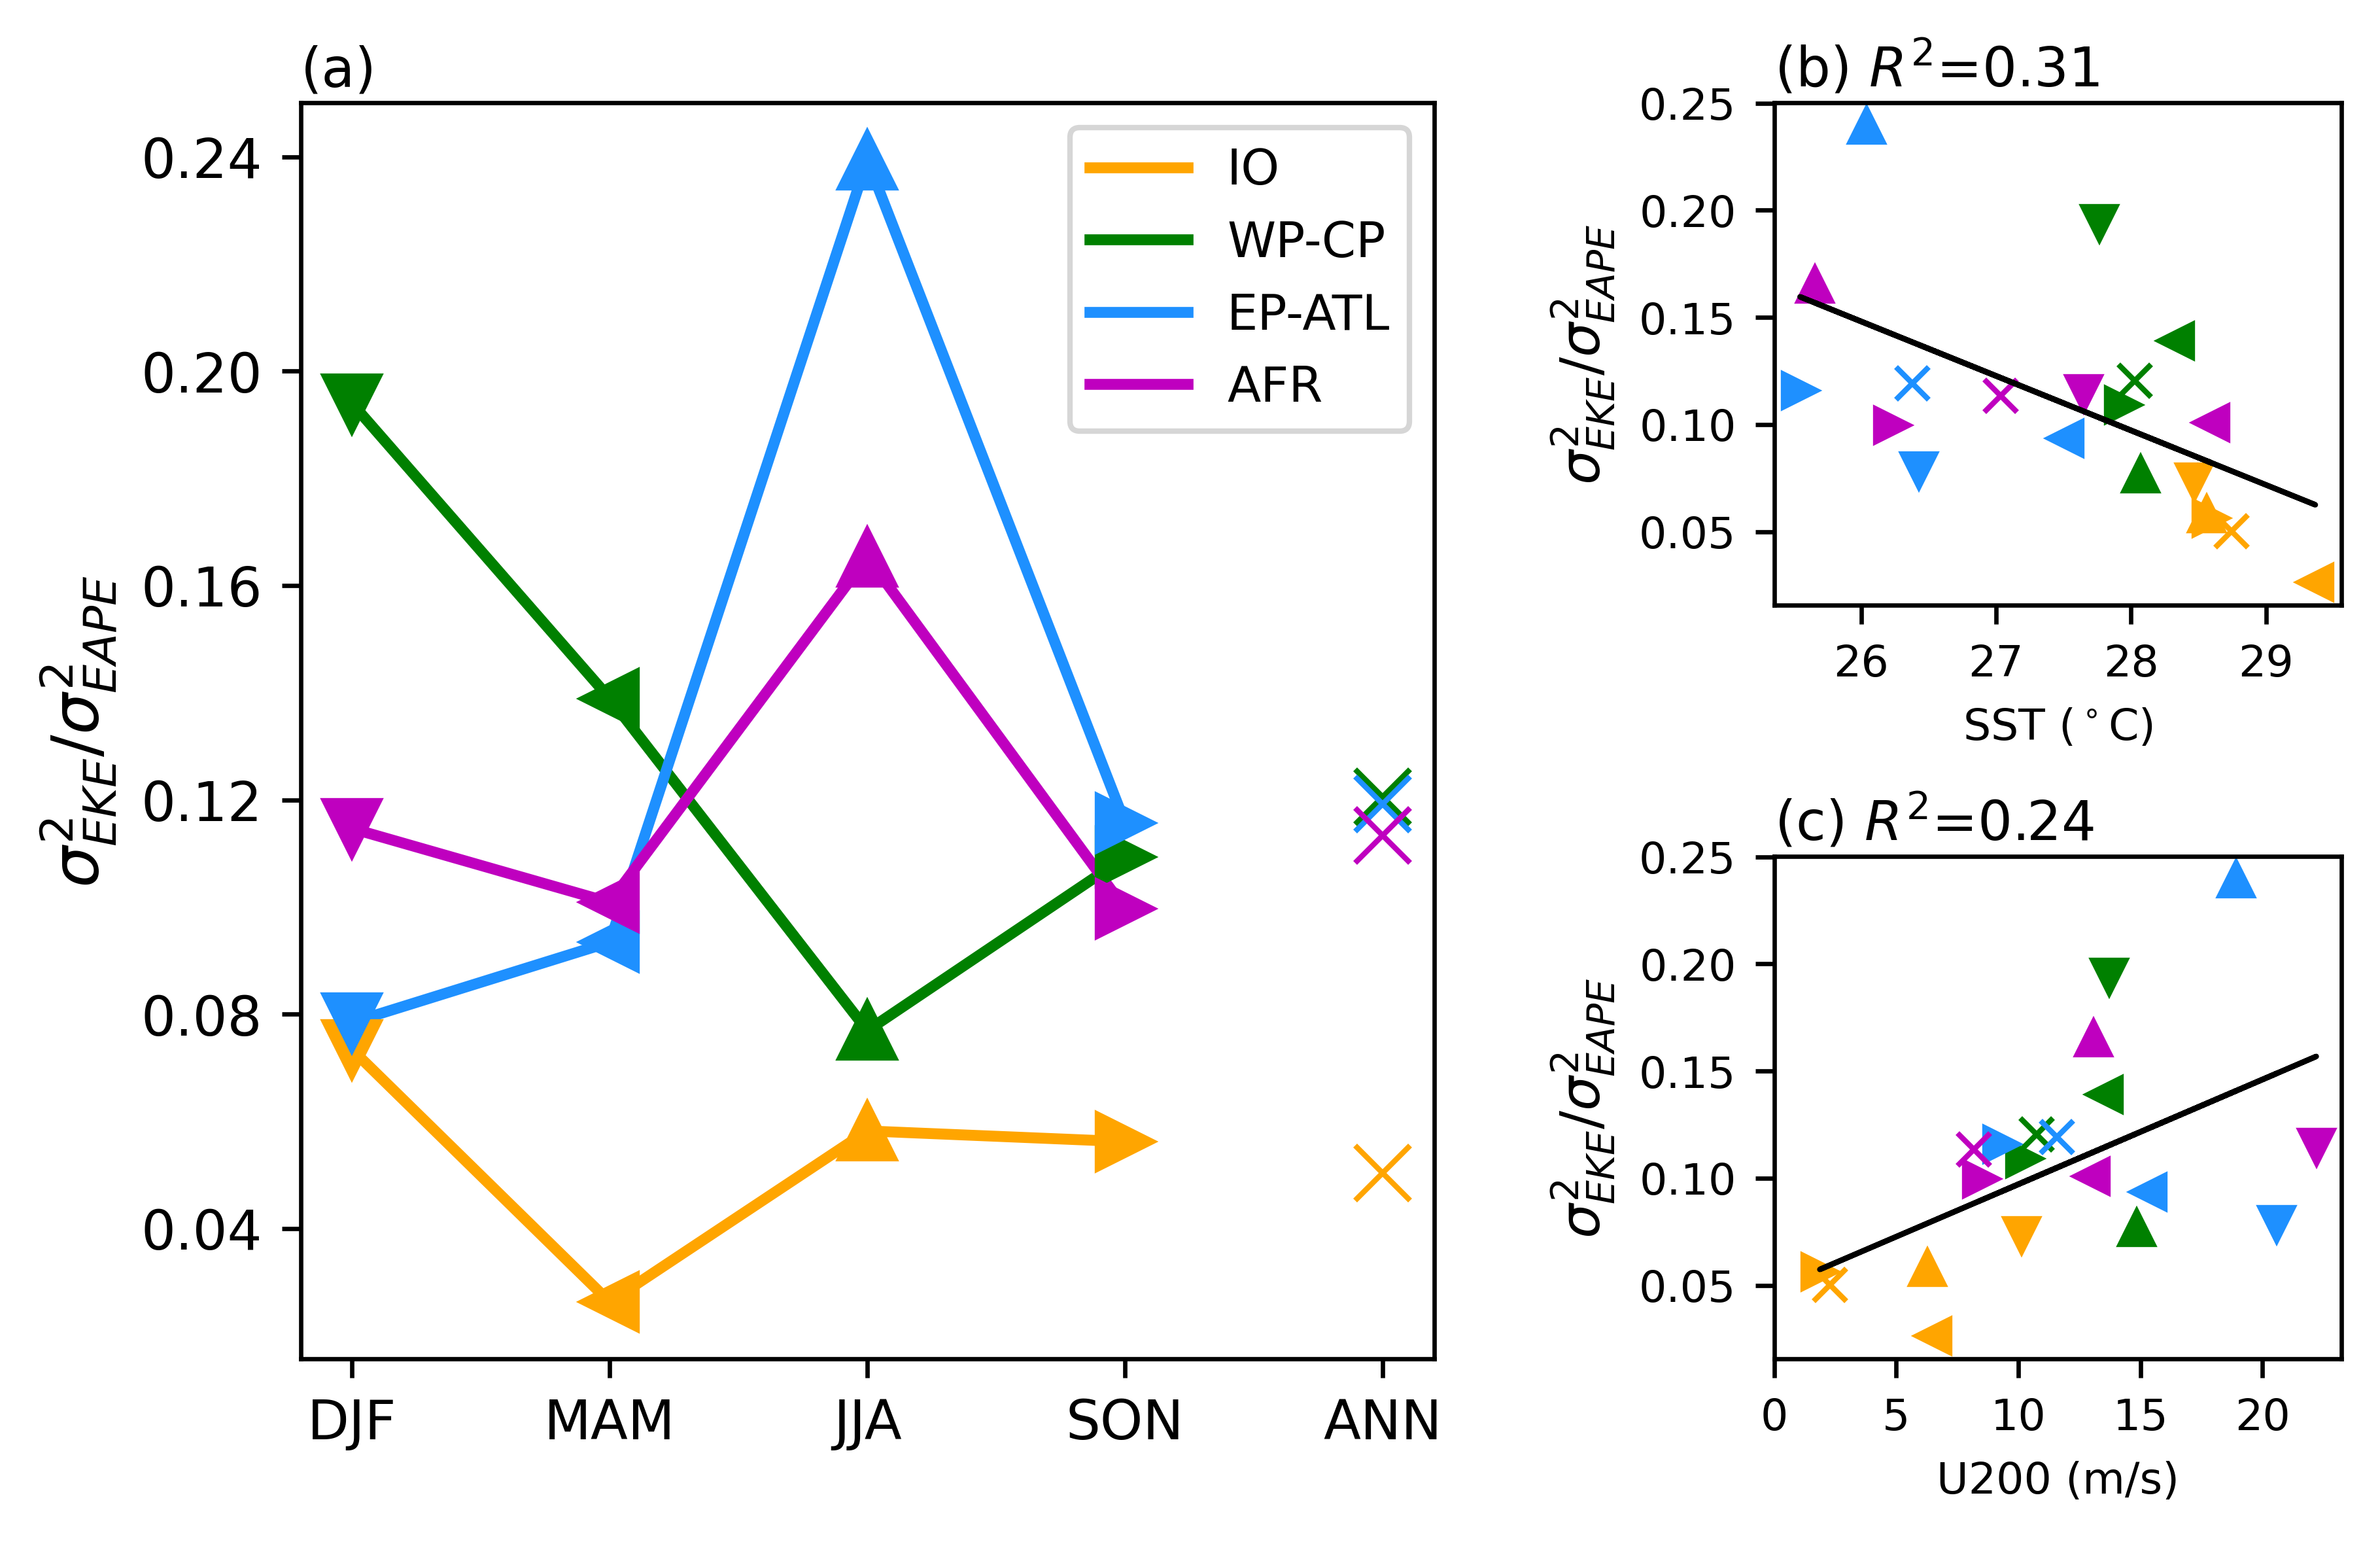

In [27]:
###########################
# Figure 3 EKE-to-EAPE ratio for each region and season
# (a) line plots for the seasonal variation of EKE-to-EAPE ratio for each region (left, big)
# (b) scatter plot between EKE-to-EAPE ratio and SST (right, top, small)
# (c) scatter plot between EKE-to-EAPE ratio and U200 (right, bottom, small)
#########################
sea = np.arange(0,nsea-1)
sea5 = np.arange(0,nsea)

fig,axes = plt.subplots(2,2,figsize=(6.5, 4),dpi=600)
gs = fig.add_gridspec(2, 2,width_ratios=[2,1])
font = 8
plt.subplots_adjust(left=0.15,right=0.95,top=0.9,bottom=0.1,wspace=0.4,hspace=0.5)
plt.rcParams.update({'font.size': font})
marker_list = list(['v','<','^','>','x'])

# (a) Plot each season (line plot)
axbig = fig.add_subplot(gs[:,0])
axbig.plot(sea,ratio_gr2[0,:-1],color='orange',linewidth=2)
axbig.plot(sea,ratio_gr2[1,:-1],color='g',linewidth=2)
axbig.plot(sea,ratio_gr2[2,:-1],color='dodgerblue',linewidth=2)
axbig.plot(sea,ratio_gr2[3,:-1],color='m',linewidth=2)
ax = plt.gca()
plt.legend(region,fontsize=9)
# Plot each season (label > < ^):
for isea in range(0,4):
    axbig.plot(sea[isea],ratio_gr2[0,isea],color='orange', marker=marker_list[isea], markersize=10)
    axbig.plot(sea[isea],ratio_gr2[1,isea],color='g', marker=marker_list[isea], markersize=10)
    axbig.plot(sea[isea],ratio_gr2[2,isea],color='dodgerblue', marker=marker_list[isea], markersize=10)
    axbig.plot(sea[isea],ratio_gr2[3,isea],color='m', marker=marker_list[isea], markersize=10)
# Plot ANN (label x):
axbig.plot(4,ratio_gr2[0,-1],color='orange',marker='x',linestyle='', markersize=10)
axbig.plot(4,ratio_gr2[1,-1],color='g',marker='x',linestyle='', markersize=10)
axbig.plot(4,ratio_gr2[2,-1],color='dodgerblue',marker='x',linestyle='', markersize=10)
axbig.plot(4,ratio_gr2[3,-1],color='m',marker='x',linestyle='', markersize=10)
plt.yticks(np.arange(0.04,0.28,0.04),fontsize=10)
plt.xticks(sea5,('DJF','MAM','JJA','SON','ANN'),fontsize=10)
plt.ylabel('$\u03C3^{\t{2}}_{\t{EKE}}$/$\u03C3^{\t{2}}_{\t{EAPE}}$',fontsize=12)        
plt.title('(a)', pad=3, loc='left',fontsize=10)     

#############################################
# (b) Plot scatter plot between SST and EAPE/EKE growth rate
ax2  = fig.add_subplot(gs[ 0,1 ])
ax = plt.gca()
for isea in range(0,5):
    ax.plot(sst_region_mean[0,isea],ratio_gr2[0,isea],color='orange',marker=marker_list[isea], linestyle='')
    ax.plot(sst_region_mean[1,isea],ratio_gr2[1,isea],color='g',marker=marker_list[isea], linestyle='')
    ax.plot(sst_region_mean[2,isea],ratio_gr2[2,isea],color='dodgerblue',marker=marker_list[isea], linestyle='')
    ax.plot(sst_region_mean[3,isea],ratio_gr2[3,isea],color='m',marker=marker_list[isea], linestyle='')
ax.plot(sst_flat, ypred_sst_ratio, 'k', linewidth=1) #start here
plt.tick_params(labelbottom=True,labeltop=False,labelleft=True,labelright=False)
plt.xticks(np.arange(26,30,1))
plt.xlabel('SST ($^\circ$C)',fontsize=8)
plt.ylabel('$\u03C3^{\t{2}}_{\t{EKE}}$/$\u03C3^{\t{2}}_{\t{EAPE}}$',fontsize=10)
plt.title('(b) $R^{2}$='+rs_sst_ratio, pad=3, loc='left',fontsize=10)

###########################################
# (c) Plot scatter plot between U200 and EAPE/EKE growth rate
ax2  = fig.add_subplot(gs[ 1,1 ])
ax = plt.gca()
for isea in range(0,5):
    ax.plot(u200_10_20_region_mean[0,isea],ratio_gr2[0,isea],color='orange',marker=marker_list[isea], linestyle='')
    ax.plot(u200_10_20_region_mean[1,isea],ratio_gr2[1,isea],color='g',marker=marker_list[isea], linestyle='')
    ax.plot(u200_10_20_region_mean[2,isea],ratio_gr2[2,isea],color='dodgerblue',marker=marker_list[isea], linestyle='')
    ax.plot(u200_10_20_region_mean[3,isea],ratio_gr2[3,isea],color='m',marker=marker_list[isea], linestyle='')
ax.plot(u200_flat, ypred_u200_ratio, 'k', linewidth=1)
plt.xlabel('U200 (m/s)',fontsize=8)
plt.ylabel('$\u03C3^{\t{2}}_{\t{EKE}}$/$\u03C3^{\t{2}}_{\t{EAPE}}$',fontsize=10)
plt.xticks(np.arange(0,25,5),fontsize=8)
plt.tick_params(labelbottom=True,labeltop=False,labelleft=True,labelright=False)
plt.title('(c) $R^{2}$='+rs_u200_ratio, pad=3, loc='left',fontsize=10)

for ax in axes[0:,-1]:
    ax.remove()
for ax in axes[0:,0]:
    ax.remove()
    
plt.savefig(fig_dir+'Fig3_EKE2-EAPE2-ratio_SST_U200.png',dpi=600)
plt.show()